In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

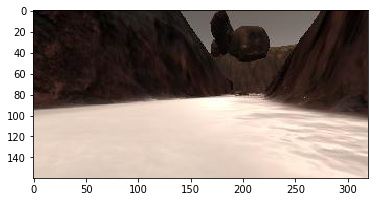

In [11]:
%matplotlib inline
image = mpimg.imread('/Users/pu/robotics/RoboND-Rover-Project/perfect_drive/IMG/robocam_2017_05_30_10_44_03_182.jpg')
plt.imshow(image)
plt.show()

In [4]:
# Define a function to perform a color threshold
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    ####### TODO 
    # Create an empty array the same size in x and y as the image 
        # but just a single channel
    # Apply the thresholds for RGB and 
        # assign 1's where threshold was exceeded
    thresh = np.array(rgb_thresh)
    thresh.reshape((1, 1, -1))
    binary_image = img > thresh
    binary_image = np.all(binary_image, axis=-1)
    binary_image = binary_image.astype('uint8')
    return binary_image

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

In [5]:
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
source = np.float32([[14.32 , 140.71], [ 120.78, 95.5], [199.49 ,96.84], [302.7 ,140.71]])

dst_size = 5
bottom_offset = 6
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset - 2*dst_size],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset - 2*dst_size], 
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset]])


<IPython.core.display.Javascript object>


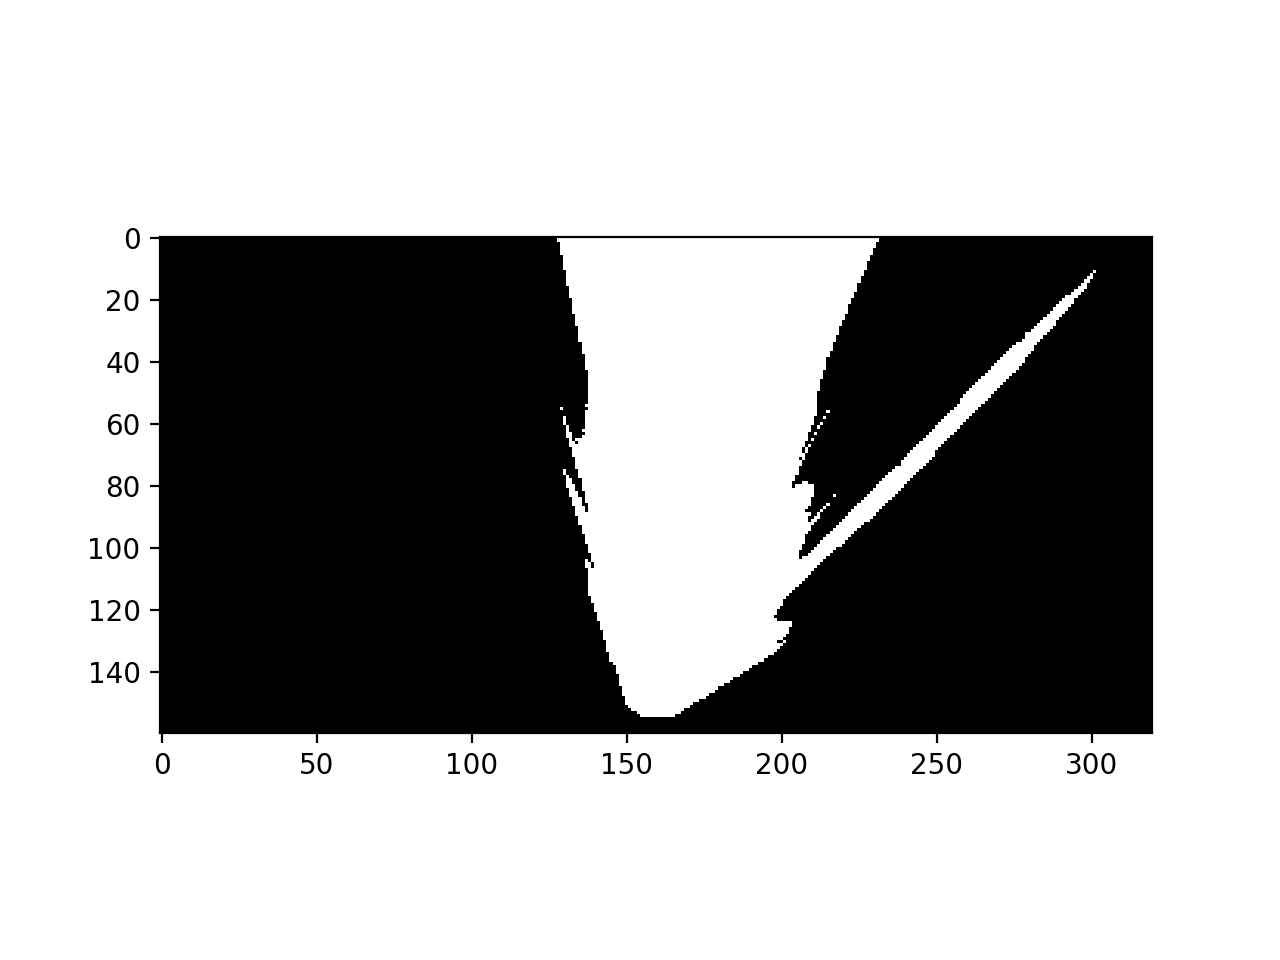

In [6]:
warped = perspect_transform(image, source, destination)
plt.imshow(warped)
plt.show()

In [7]:
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))
# Plot the result
plt.imshow(colorsel, cmap='gray')
plt.show()

In [60]:
def rover_coords(binary_img):
    # Extract xpos and ypos pixel positions from binary_img and
    # Convert xpos and ypos to rover-centric coordinates
    ypos, xpos = binary_img.nonzero()
    xpos = xpos.astype('float32')
    ypos = ypos.astype('float32')
    nxpos = image.shape[0] - ypos
    nypos = -(xpos - (image.shape[1] / 2))
    return nxpos, nypos

In [68]:
xpos, ypos = rover_coords(colorsel)

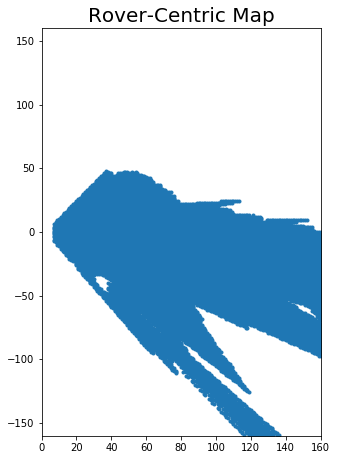

In [69]:
fig = plt.figure(figsize=(5, 7.5))
plt.plot(xpos, ypos, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
plt.title('Rover-Centric Map', fontsize=20)
plt.show()

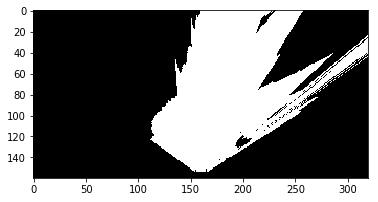

In [38]:
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))
# Plot the result
plt.imshow(colorsel, cmap='gray')
plt.show()

In [103]:
points = np.array([xpos, ypos])

In [108]:
def inverse_rotation_matrix(yaw):
    return np.array([[np.cos(yaw), -np.sin(yaw)], [np.sin(yaw), -np.cos(yaw)]]).transpose()

In [109]:
npoints = np.matmul(inverse_rotation_matrix(-np.pi/2), points)

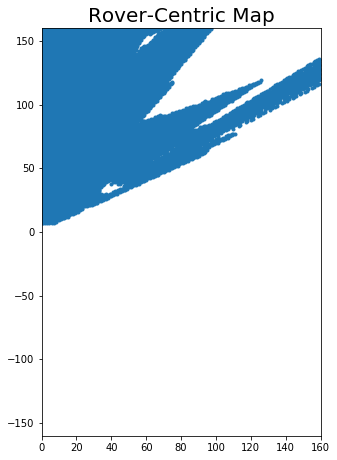

In [110]:
fig = plt.figure(figsize=(5, 7.5))
plt.plot(npoints[0, :], npoints[1,:], '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
plt.title('Rover-Centric Map', fontsize=20)
plt.show()

In [113]:
def inverse_translation(points, coord, scale):
    npoints = points / scale
    npoints += np.array(coord).reshape(-1, 1)
    return npoints

In [127]:
nnpoints = inverse_translation(npoints, (5, -10), 10)

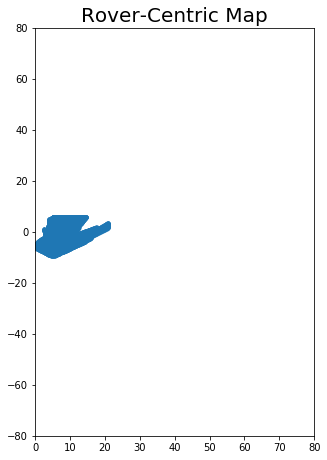

In [130]:
fig = plt.figure(figsize=(5, 7.5))
plt.plot(nnpoints[0, :], nnpoints[1,:], '.')
plt.ylim(-80, 80)
plt.xlim(0, 80)
plt.title('Rover-Centric Map', fontsize=20)
plt.show()

In [126]:
npoints[1, :].min()

7.0

In [134]:
print(image.shape)

(160, 320, 3)


In [135]:
npoints[0]

array([  9.79717439e-15,   1.00000000e+00,   2.00000000e+00, ...,
         4.00000000e+00,   6.00000000e+00,   7.00000000e+00])